# K-Means Clustering

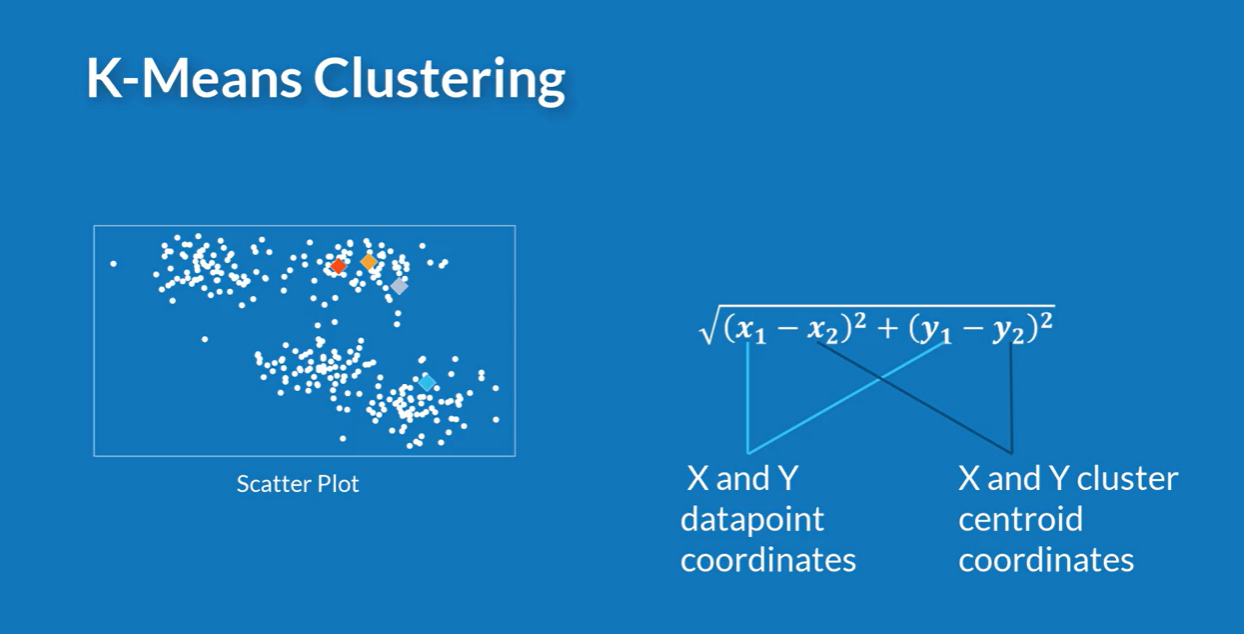

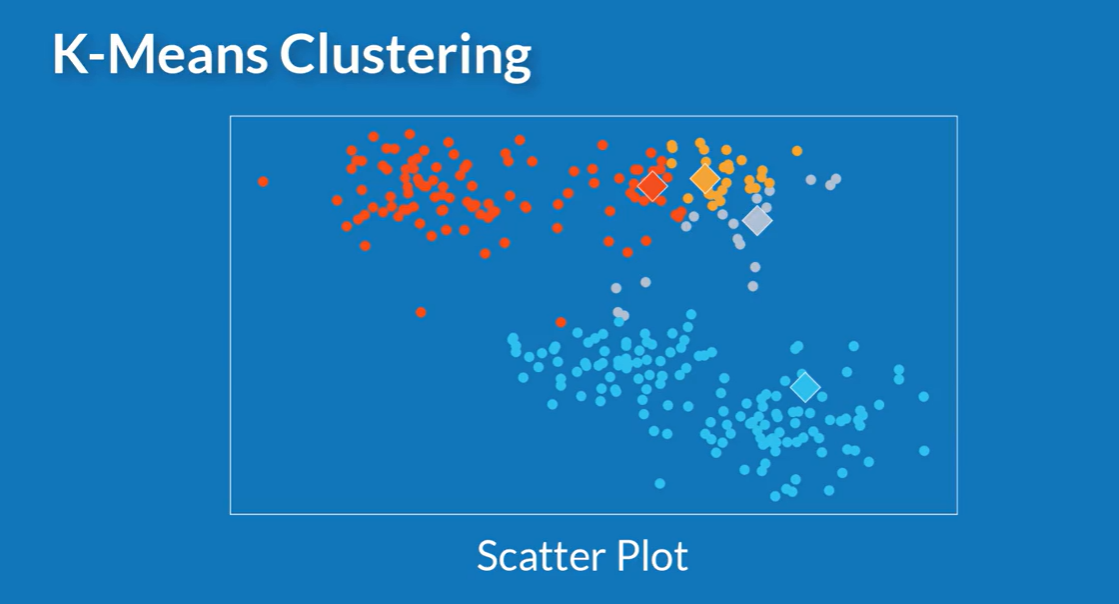

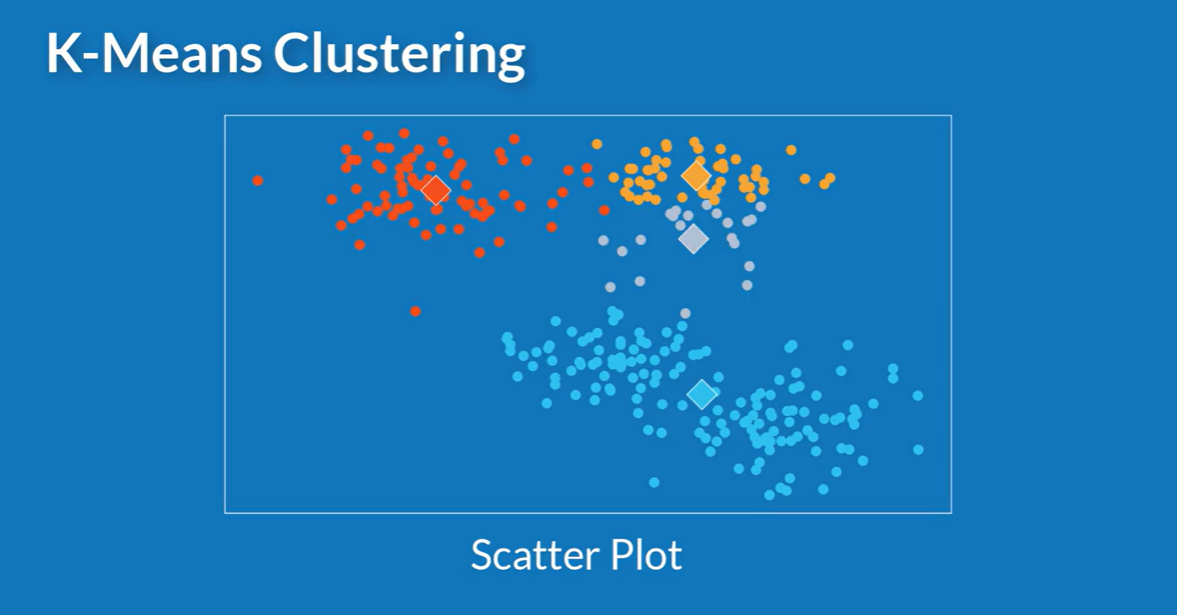

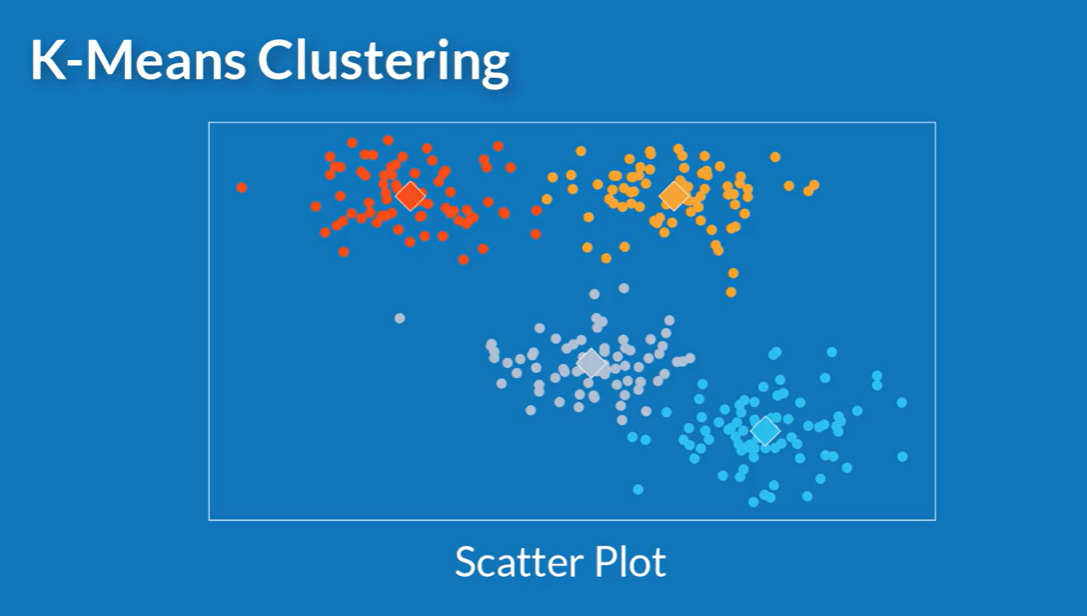

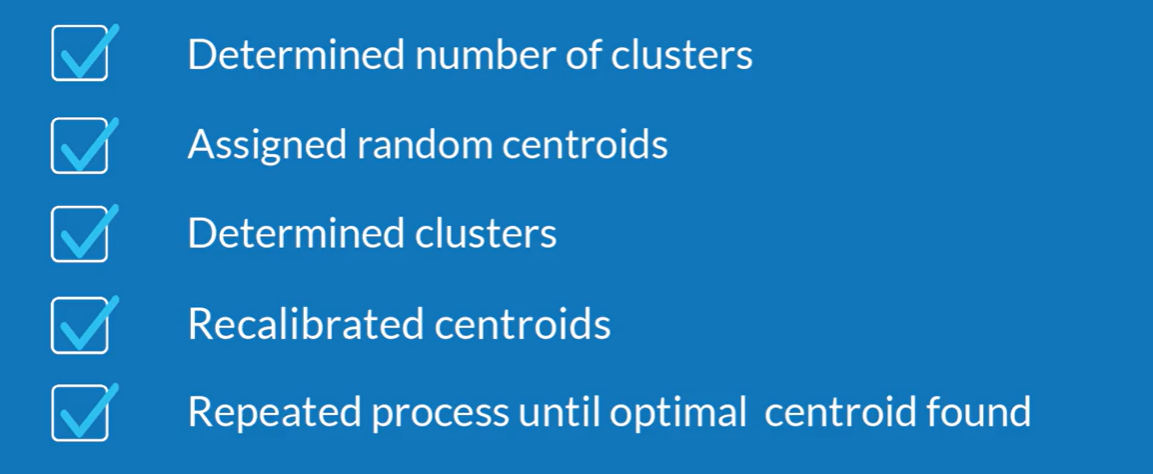

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

mall_customer_dataset = pd.read_csv("mall_customer_dataset.csv", index_col=0)
mall_customer_dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
mall_customer_dataset=pd.get_dummies(mall_customer_dataset,columns=["Gender"])
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
CustomerID,,,,,
1,19,15,39,0,1
2,21,15,81,0,1
3,20,16,6,1,0
4,23,16,77,1,0
5,31,17,40,1,0


In [4]:
mall_customer_dataset = mall_customer_dataset.drop("Gender_Male", axis=1)
mall_customer_dataset.rename(columns={"Gender_Female": "Gender"}, inplace=True)
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,19,15,39,0
2,21,15,81,0
3,20,16,6,1
4,23,16,77,1
5,31,17,40,1


# Visualizing the Data

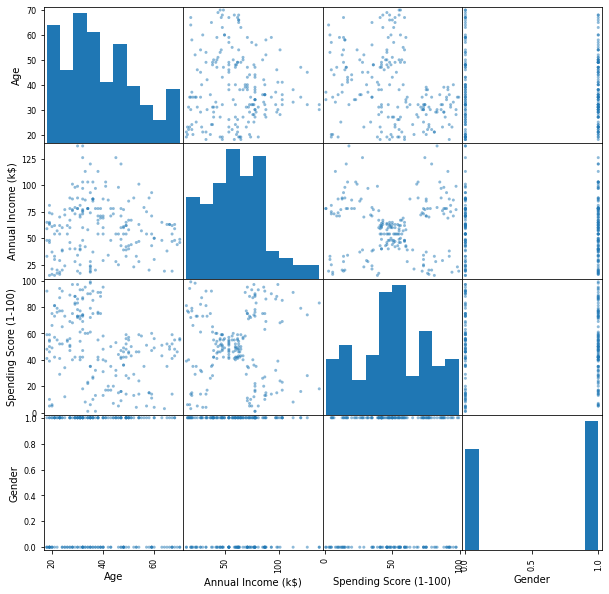

In [5]:
pd.plotting.scatter_matrix(mall_customer_dataset,figsize=[10,10]);

# Running the Model

In [6]:
income_spending = mall_customer_dataset[["Annual Income (k$)","Spending Score (1-100)"]]

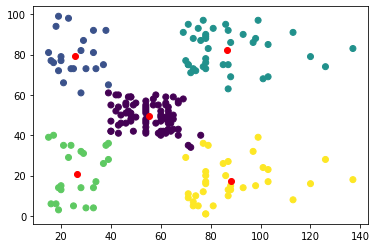

In [7]:
from sklearn.cluster import KMeans

K=5

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(income_spending)

import matplotlib.pyplot as plt

plt.scatter(income_spending["Annual Income (k$)"],income_spending["Spending Score (1-100)"],c=cluster)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red')
plt.show()

# Expanding the Model

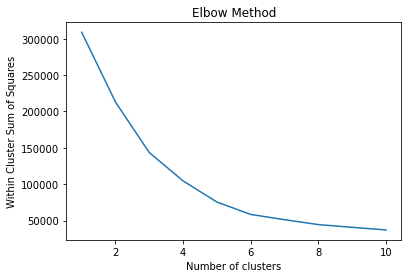

In [8]:
#Within cluster sum of squares
OMP_NUM_THREADS=1
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(mall_customer_dataset)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show();

In [9]:
K=6

kmeans = KMeans(n_clusters=K)
cluster = kmeans.fit_predict(mall_customer_dataset)

In [10]:
mall_customer_dataset["Cluster"] = cluster
mall_customer_dataset.to_csv("mall_customer_dataset_clusters.csv")
mall_customer_dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster
CustomerID,,,,,
1,19,15,39,0,5
2,21,15,81,0,0
3,20,16,6,1,5
4,23,16,77,1,0
5,31,17,40,1,5
